In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import pandas as pd 

import ast

train = pd.read_csv('../input/train.csv')

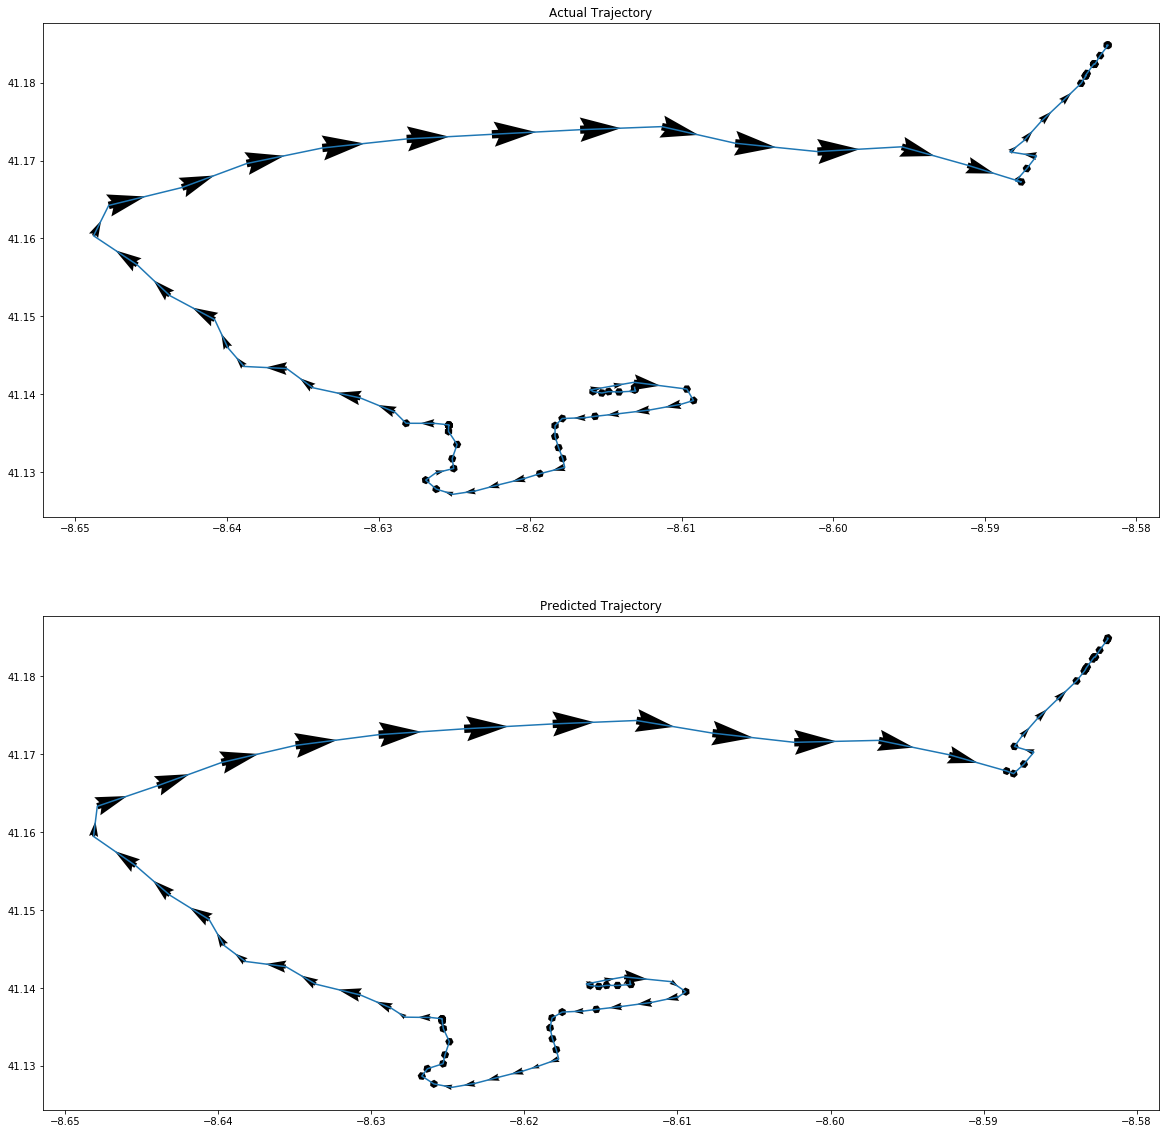

In [24]:
import functools 

class vectorize(np.vectorize):
    def __get__(self,obj,objtype):
        return functools.partial(self.__call__,obj)

#Python implementation of: https://en.wikipedia.org/wiki/Alpha_beta_filter
#a: alpha parameter (0<=a<=1)
#b: beta parameter (0<=b<=1)
#dt: time between measurements
#xk_1: initial position
#vk_1: initial velocity
#xk: updated position
#vk: updated velocity
#rk: updated innovation 
#fitted: predicted positions (xk values)
#v_pred: predicted velocities (vk values)

class AB_Filter(object):
    def __init__(self,a,b,dt):
        self.a = a
        self.b = b
        self.dt = dt 
        self.xk_1 = 0
        self.vk_1 = 0
        self.xk = None
        self.vk = None
        self.rk = None
        self.fitted = list()
        self.v_pred = list()
    
    @vectorize
    def predict(self,args):
        self.xk = self.xk_1 + np.dot(self.vk_1,self.dt)
        self.vk = self.vk_1
        
        self.rk = args - self.xk
        
        self.xk = self.xk + np.dot(self.a,self.rk)
        self.vk = self.vk + np.divide(np.dot(self.b,self.rk),self.dt)

        self.xk_1 = self.xk
        self.vk_1 = self.vk

        self.fitted.append(self.xk_1)
        self.v_pred.append(self.vk_1)
      
def direction(X,Y):
    U = X[1:len(X)] - X[0:len(X)-1]
    V = Y[1:len(Y)] - Y[0:len(Y)-1]
    return U,V

def plot(X,Y,X_PRED,Y_PRED):
    
    plt.rcParams['figure.figsize'] = (20,20)
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.title.set_text('Actual Trajectory')
    U,V = direction(X,Y)
    for i in range(0,len(U)):
        plt.quiver(X[i],Y[i],U[i],V[i],scale=2,scale_units='xy',angles='xy')
    plt.plot(X,Y)
    
    ax2 = fig.add_subplot(212)
    ax2.title.set_text('Predicted Trajectory')
    U,V = direction(X_PRED,Y_PRED)
    for i in range(0,len(U)):
        plt.quiver(X_PRED[i],Y_PRED[i],U[i],V[i],scale=2,scale_units='xy',angles='xy')
    plt.plot(X_PRED,Y_PRED[0:len(X_PRED)])

def main():

    dt = 0.5
    a = 0.80 
    b = 0.005
    
    gps = np.array(ast.literal_eval(train.POLYLINE[132]))
    X = gps[:,0]
    Y = gps[:,1]
    
    LONG = AB_Filter(a=a,b=b,dt=dt)
    LONG.xk_1 = Y[0] #initial latitude
    LONG.predict(Y)
    LONG_PRED = np.array(LONG.fitted)
    LAT = AB_Filter(a=a,b=b,dt=dt)
    LAT.xk_1 = X[0] #initial longitude 
    LAT.predict(X)
    LAT_PRED = np.array(LAT.fitted)
    
    plot(X,Y,LAT_PRED,LONG_PRED)
      
main()
    